In [3]:
# Student id 1913617
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Reading training data
df_train = pd.read_csv("train.csv") #You should change the path to dataset in your computer
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Reading testing data
df_test = pd.read_csv("test.csv") #You should change the path to dataset in your computer
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#Trying to see how much data we have and all Features we have. And we can decide that there are missing Age and Cabin data.
print(df_train.shape)
df_train.count()

(891, 12)


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
#Trying to see how much data we have and all Features we have. And we can decide that there are missing Age and Cabin data.
print(df_test.shape)
df_test.count() 

(418, 11)


PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [38]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
pip install missingno # install package for clearly see what data we miss

Note: you may need to restart the kernel to use updated packages.


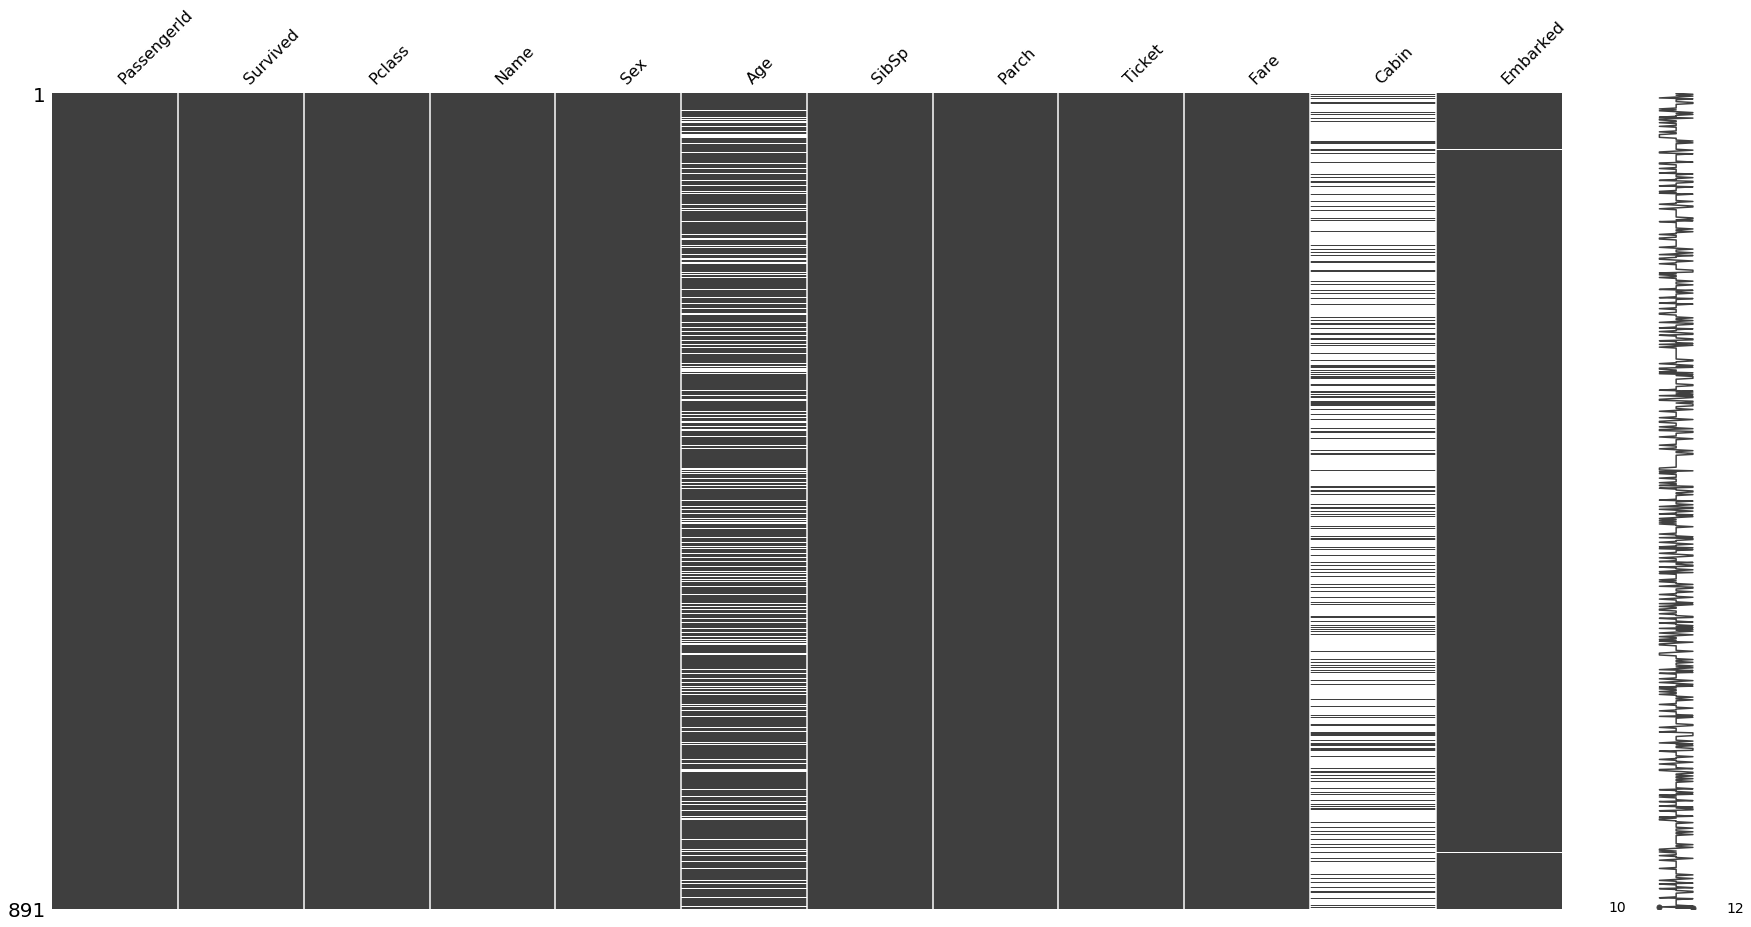

In [28]:
import missingno
missingno.matrix(df_train, figsize = (30,15)) 
# plot the data to see what data we miss. IT is clear that we miss some age values and Cabin. 
#And some in Enbarked

# Survived feature

In [39]:
df_train['Survived'].value_counts() # Values of survived and died people

0    549
1    342
Name: Survived, dtype: int64

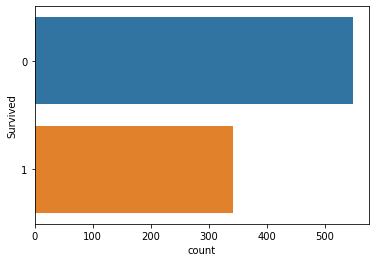

In [88]:
sns.countplot(y='Survived', data=df_train) # Plotting survived and died people quantity

# Age feature

In [107]:
df_train['Age'].mean() # the mean age is 29-30 year

29.69911764705882

In [108]:
df_train['Age'].max() # the oldes person was 80 years old

80.0

In [110]:
df_train.Age.isnull().sum() # We know that AGE feature has 177 missing values, 
#we should decide what to do with missing values when we do machine learning

177

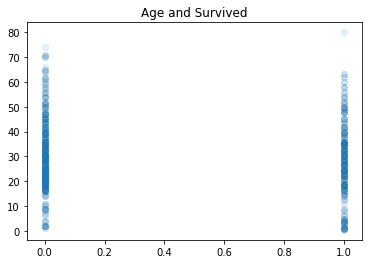

In [40]:
plt.scatter(df_train['Survived'], df_train.Age, alpha=0.1) # Scatter plot to see Age vs Survived. 
#Use alpha to see better in ending area
plt.title("Age and Survived")
plt.show()

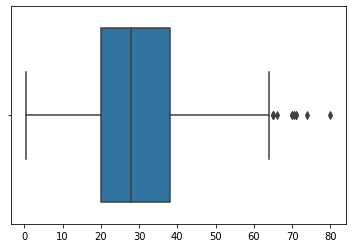

In [104]:
#Boxplot Age column to see values outliers
sns.boxplot([df_train['Age']])

# Sex feature

In [61]:
df_train['Sex'].value_counts() # printing quantity of male and female

male      577
female    314
Name: Sex, dtype: int64

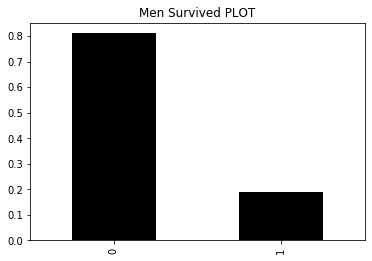

In [65]:
# Plotting surived and died men bar plot
df_train.Survived[df_train['Sex'] =="male"].value_counts(normalize=True).plot(kind='bar',color="#000000")
plt.title("Men Survived PLOT")
plt.show()

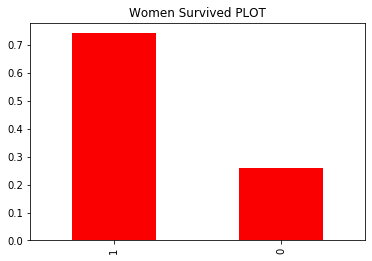

In [35]:
# Plotting survived and died women
#But As we can see Men Survived PLOT and Female Survived Plot. 
#Gender has a main role for surviving. 70% of women survived! But almost 80% of men died.
df_train.Survived[df_train['Sex'] =="female"].value_counts(normalize=True).plot(kind='bar',color="#fa0000")
plt.title("Women Survived PLOT")
plt.show()

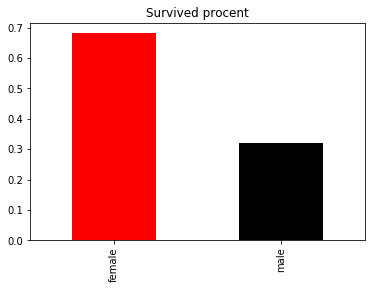

In [34]:
#compare male and female procent of survival
df_train.Sex[df_train['Survived'] == 1].value_counts(normalize=True).plot(kind='bar',color=["#fa0000","k"])
plt.title("Survived procent")
plt.show()

# Class feature

In [112]:
#Counting values by class
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

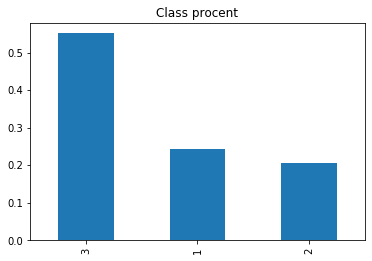

In [113]:
#Plot the procent of classes
df_train['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title("Class procent")
plt.show()

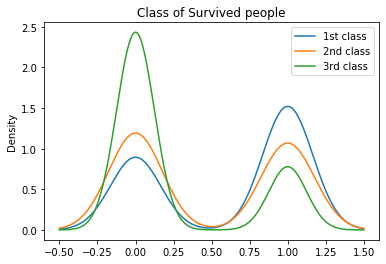

In [33]:
# I want to see how class helped to survive. 
#And after plotting we can clearly see that most of 1st class Survived besides 3rd class.

for x in [1,2,3]:
    df_train['Survived'][df_train.Pclass == x].plot(kind='kde')
plt.title("Class of Survived people")
plt.legend(("1st class","2nd class","3rd class"))
plt.show()


# Sibsp feature

In [116]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

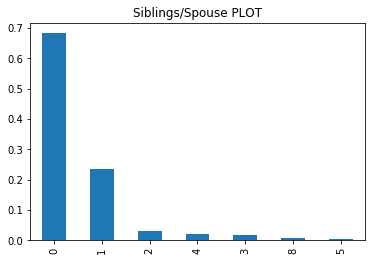

In [79]:
#Plotting SibSp column
df_train['SibSp'].value_counts(normalize=True).plot(kind='bar') # SibSp PLOT
plt.title("Siblings/Spouse PLOT")
plt.show()

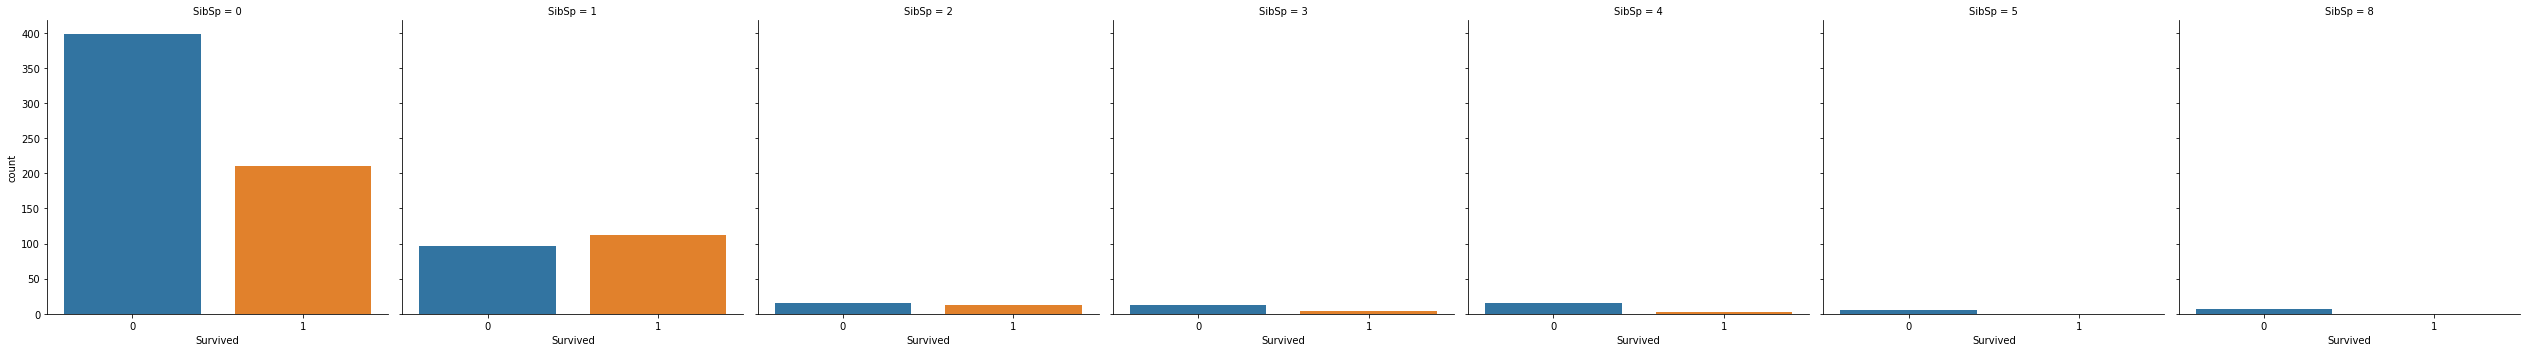

In [93]:
#Plotting SibSp column values by survival
sns.factorplot(x='Survived', col='SibSp', kind='count', data=df_train)

# Embarked feature

In [81]:
#Values of Embarked column
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

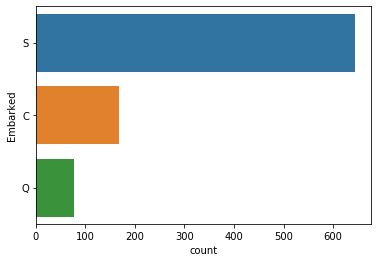

In [90]:
#Plotting values of Embarked column
sns.countplot(y='Embarked', data=df_train)

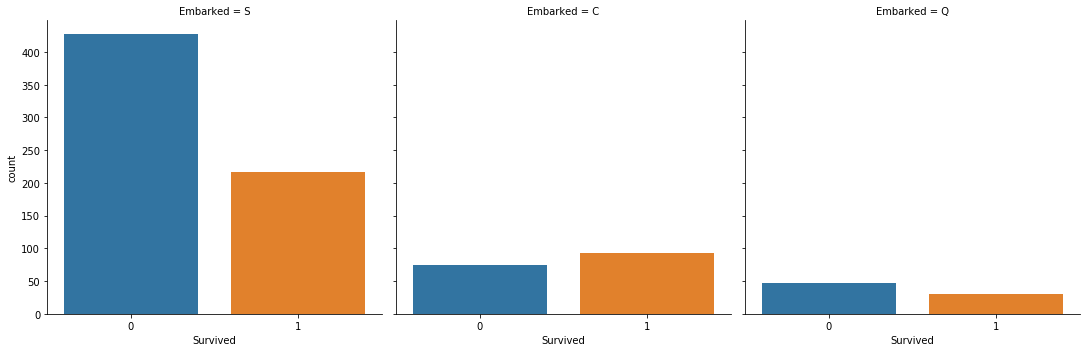

In [117]:
#Plotting Embarked column values by survival
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)